In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (16, 9)

In [2]:
df = pd.read_csv('anisotropy_radius.csv', index_col=0)
df['expression'] = df['cloud'].apply(lambda x: x.split('_')[2])
df.head()

,cloud,gf01_r_10,gf02_r_10,gf03_r_10,gf04_r_10,gf05_r_10,gf06_r_10,gf07_r_10,gf08_r_10,gf09_r_10,...,gf01_r_14,gf02_r_14,gf03_r_14,gf04_r_14,gf05_r_14,gf06_r_14,gf07_r_14,gf08_r_14,gf09_r_14,expression
0,bs000_CR_RD_0.pcd,36.062347,1.0,-101.317894,0.920264,0.319981,0.600284,0.053895,0.079736,0.247583,...,64.993530,1.0,-221.316956,0.926614,0.334016,0.592598,0.049559,0.073386,0.219347,RD
1,bs000_PR_SD_0.pcd,40.257923,1.0,-114.833755,0.908905,0.588236,0.320670,0.051454,0.091095,0.033422,...,76.548119,1.0,-268.194946,0.916742,0.613206,0.303537,0.046781,0.083258,0.038102,SD
2,bs000_LFAU_15_0.pcd,36.221920,1.0,-98.865532,0.896532,0.761360,0.135172,0.052567,0.103468,0.053658,...,70.721939,1.0,-241.128448,0.906957,0.711469,0.195487,0.049033,0.093043,0.043466,15
3,bs000_O_GLASSES_0.pcd,40.550774,1.0,-114.919006,0.888258,0.761890,0.126368,0.056283,0.111742,0.056514,...,74.836304,1.0,-255.254868,0.849477,0.717154,0.132324,0.074583,0.150523,0.079030,GLASSES
4,bs000_UFAU_44_0.pcd,43.638218,1.0,-129.124741,0.933253,0.787089,0.146165,0.034753,0.066747,0.039851,...,83.077682,1.0,-297.896545,0.919873,0.751871,0.168002,0.041904,0.080127,0.053701,44


- gf01 Somatório: λ1 + λ2 + λ3
- gf02 Omnivariância: (λ1 * λ2 * λ3) ^ 1/3
- gf03 Autoentropia: Somatório i=1 λi * ln(λi)
- gf04 Anisotropia: (λ1 − λ3) / λ1
- gf05 Planaridade: (λ2 − λ3) / λ1
- gf06 Linearidade: (λ1 − λ2) / λ1
- gf07 Variação de superfı́cie: λ3 / (λ1 + λ2 + λ3)
- gf08 Esfericidade: λ3 / λ1
- gf09 Verticalidade: 1 − |<[0 0 1], e3>|

In [35]:
features = [
    'Somatório', 'Omnivariância', 'Autoentropia',
    'Anisotropia', 'Planaridade', 'Linearidade',
    'Variação de superfície', 'Esfericidade', 'Verticalidade'
]

In [3]:
columns = df.columns[1:]

In [50]:
def plot_histograms(df, radius=10, expression=None):
    nrows, ncols = 3, 3
    fig, axes = plt.subplots(nrows, ncols)
    fig.tight_layout()
    
    cols = [f'gf01_r_{radius}', f'gf02_r_{radius}', f'gf03_r_{radius}',
            f'gf04_r_{radius}', f'gf05_r_{radius}', f'gf06_r_{radius}',
            f'gf07_r_{radius}', f'gf08_r_{radius}', f'gf09_r_{radius}']

    if expression is not None:
        df = df.loc[df['expression'] == expression]

    df = df[columns]

    i, j = 0, 0 # refactor
    for index, column in enumerate(cols):
        df.hist(ax=axes[i, j], column=[column], bins=10)
        axes[i, j].set_title(features[index])
        j += 1
        if j == 3:
            i += 1
            j = 0

    expression = '' if expression is None else f' - Expressão: {expression}'
    print(f'Histogramas - Raio: {radius} {expression}')
#     fig.suptitle(f'Histogramas - Raio: {radius} {expression}')
    plt.show()

Histogramas - Raio: 10 


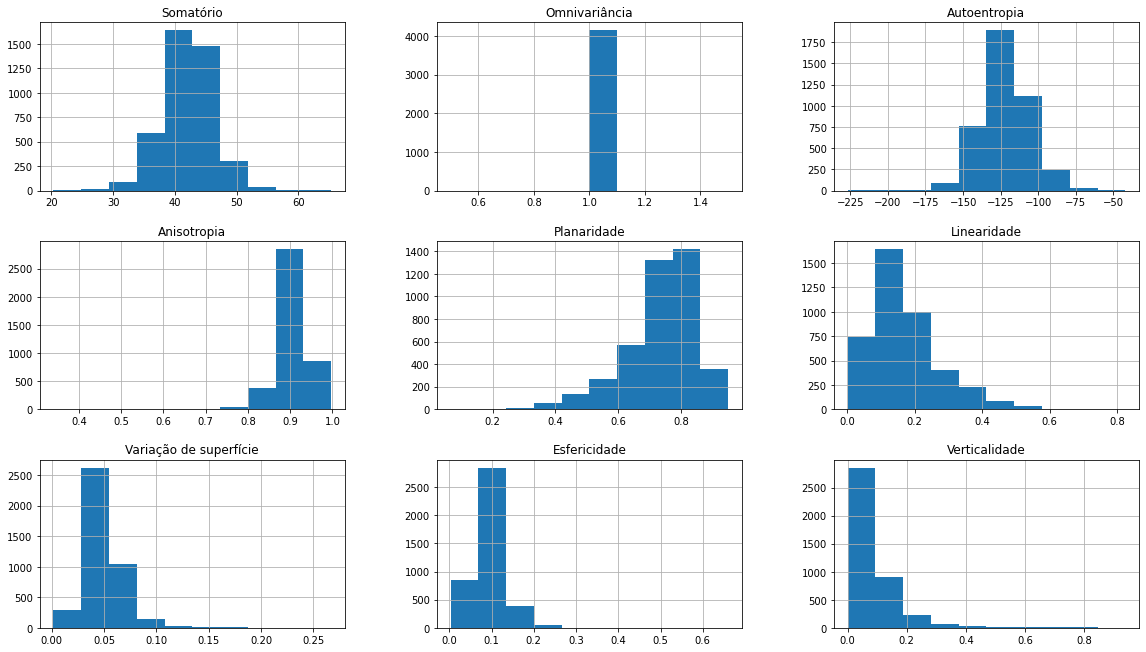

In [51]:
plot_histograms(df)

Histogramas - Raio: 14 


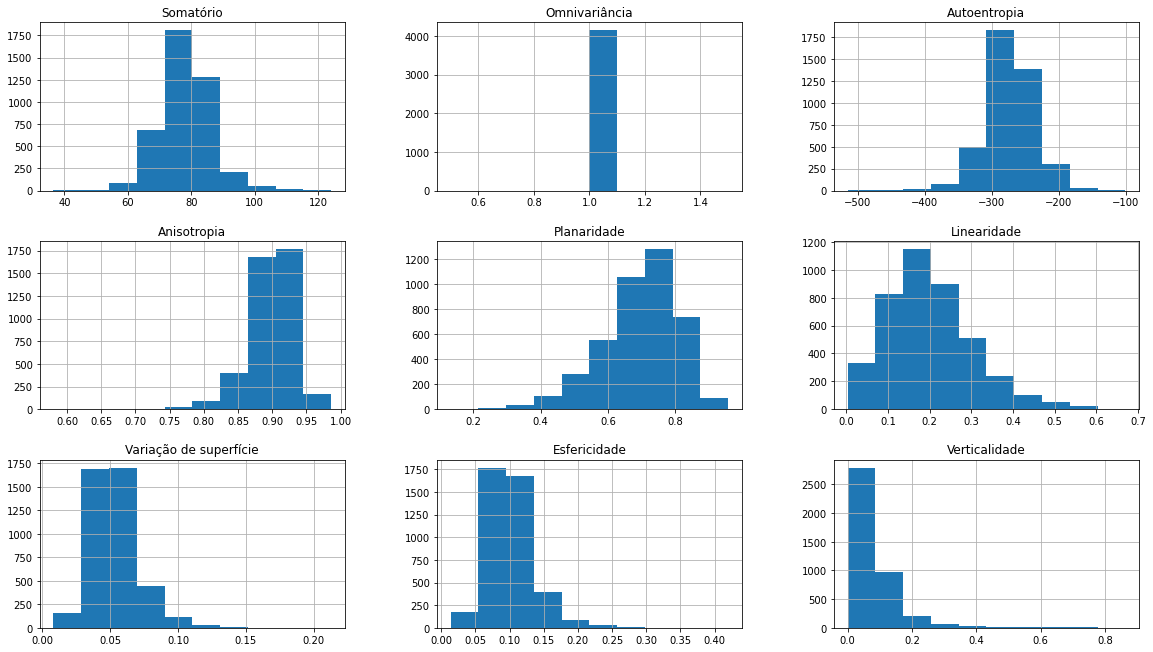

In [52]:
plot_histograms(df, radius=14)

Histogramas - Raio: 13 


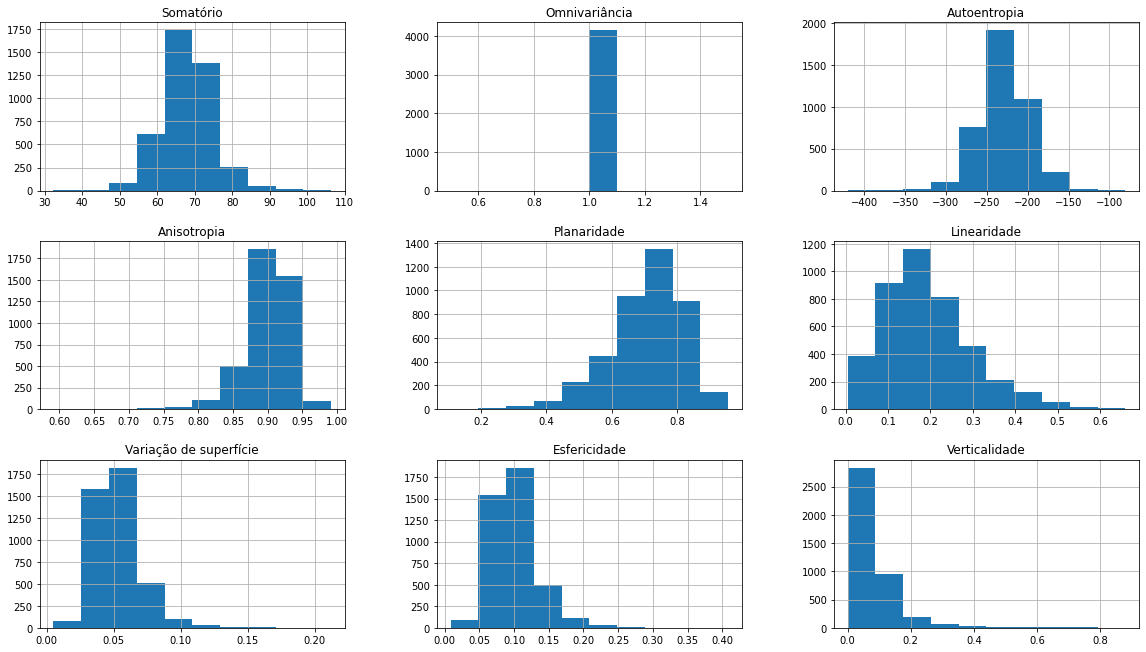

In [53]:
plot_histograms(df, radius=13)

Histogramas - Raio: 13  - Expressão: HAPPY


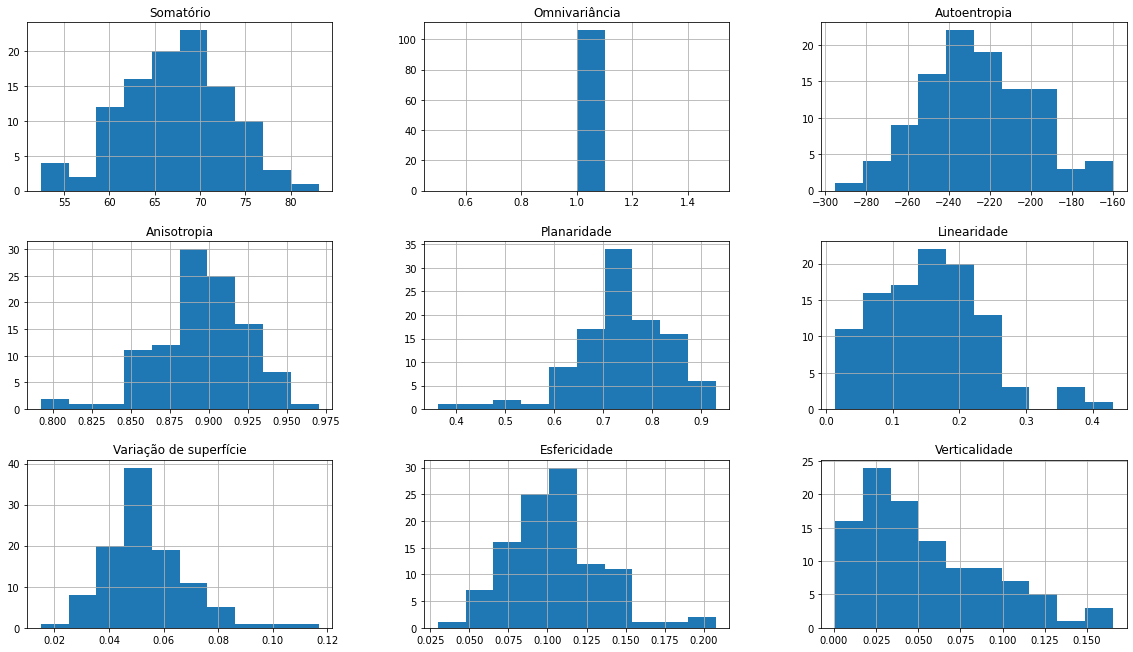

In [54]:
plot_histograms(df, radius=13, expression='HAPPY')

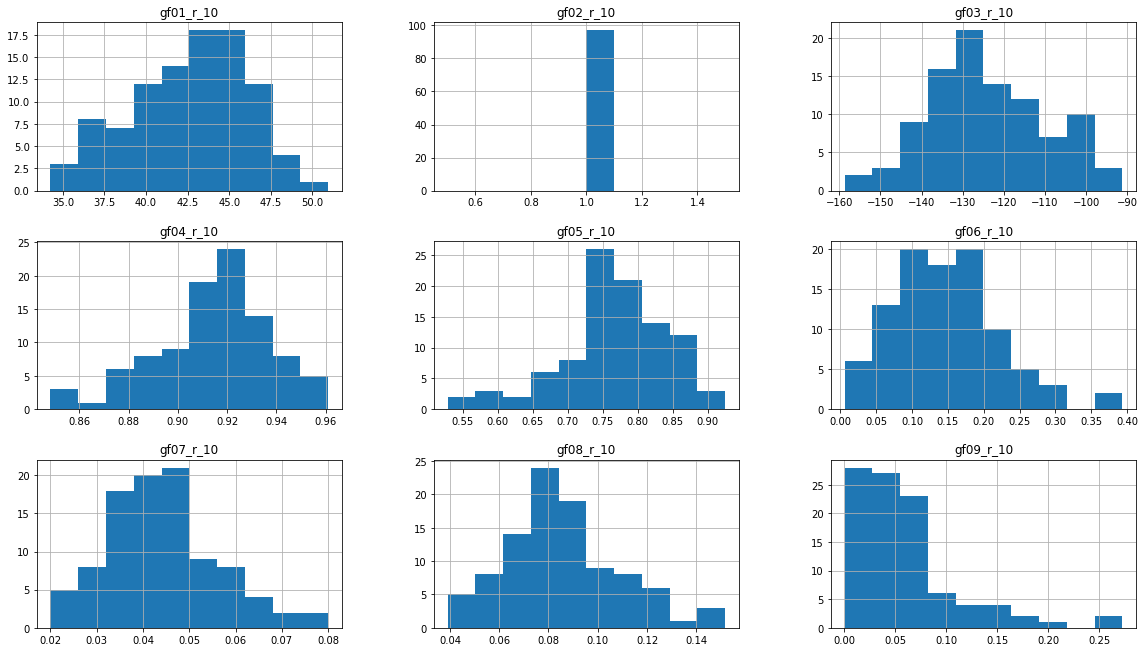

In [9]:
plot_histograms(df, radius=10, expression='A22A25')

In [77]:
# gfIndex: valor entre 0-8
# 0 significa Somatório
# 8 significa Verticalidade
def plot_histogram_together(df, gfIndex=0):
    colors = ['blue', 'orange', 'green', 'red', 'purple']
    labels = ['Raio 10', 'Raio 11', 'Raio 12', 'Raio 13', 'Raio 14']
    
    colsNames = []
    for i in range(9):
        aux = []
        for i in np.arange(i, 45, 9):
            aux.append(columns[i])
        colsNames.append(aux)        
    
    arr = []
    for col in colsNames[gfIndex]:
        arr.append(df[col])

    plt.hist(arr, bins=10, label=labels)
    plt.title('Histograma: ' + features[gfIndex])
    plt.legend(loc='upper right')

    plt.show()

In [75]:
def plot_histograms_together(df, gf=None):
    colors = ['blue', 'orange', 'green', 'red', 'purple']
    labels = ['Raio 10', 'Raio 11', 'Raio 12', 'Raio 13', 'Raio 14']
    
    colsNames = []
    for i in range(9):
        aux = []
        for i in np.arange(i, 45, 9):
            aux.append(columns[i])
        colsNames.append(aux)        
    
    nrows, ncols = 3, 3
    fig, axes = plt.subplots(nrows, ncols)
    fig.tight_layout()
    
    i, j = 0, 0 # refactor
    for index, col in enumerate(colsNames):
        arr = []
        for c in col:
            arr.append(df[c])
        
        axes[i, j].hist(arr, bins=10, label=labels)
        axes[i, j].set_title(features[index])
        axes[i, j].legend(loc='upper right')
        j += 1
        if j == 3:
            i += 1
            j = 0

    plt.show()

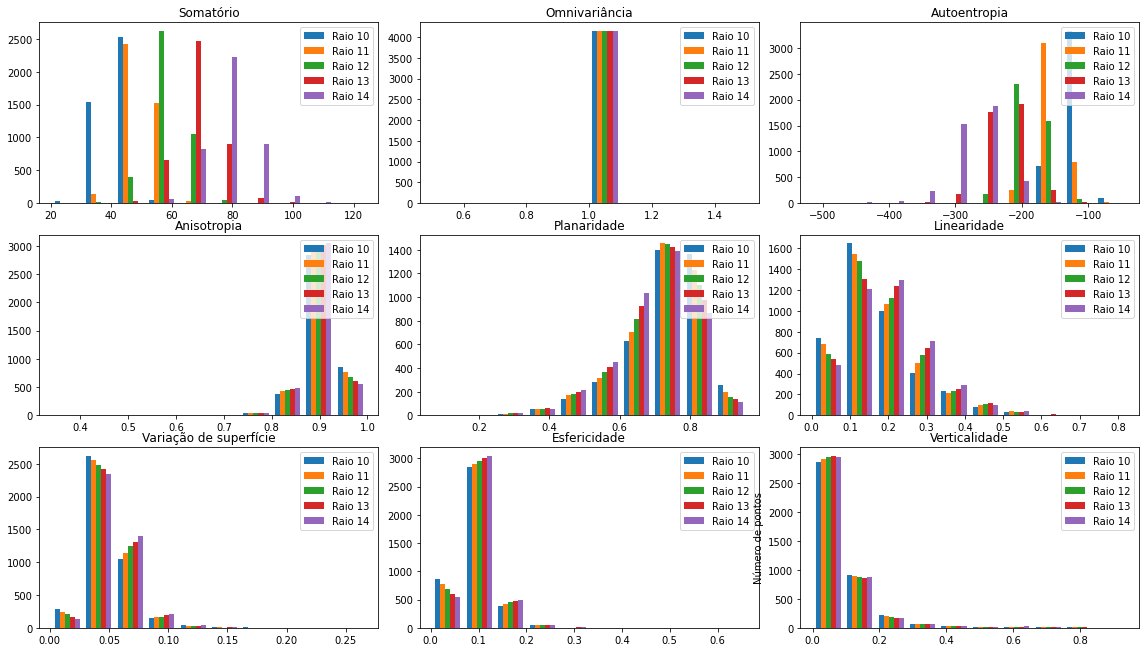

In [67]:
plot_histograms_together(df)

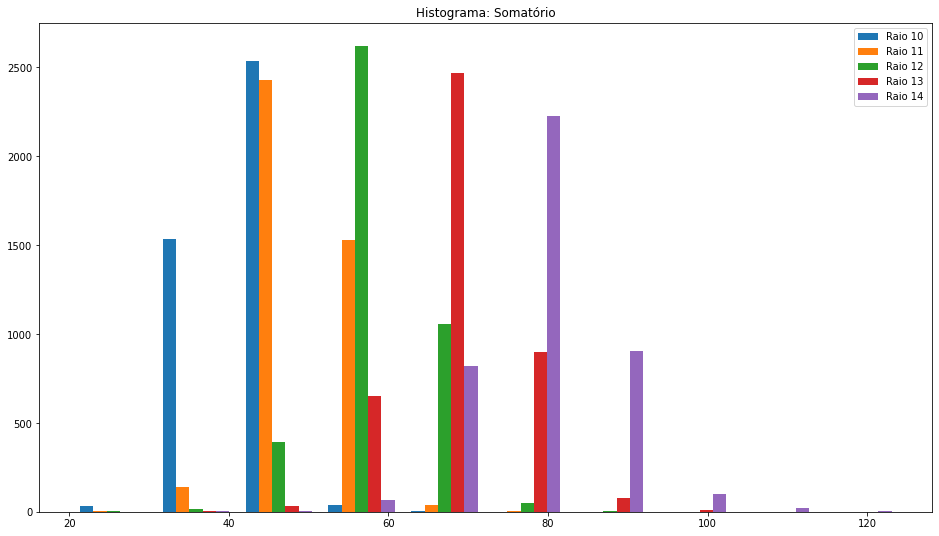

In [78]:
plot_histogram_together(df, gfIndex=0)

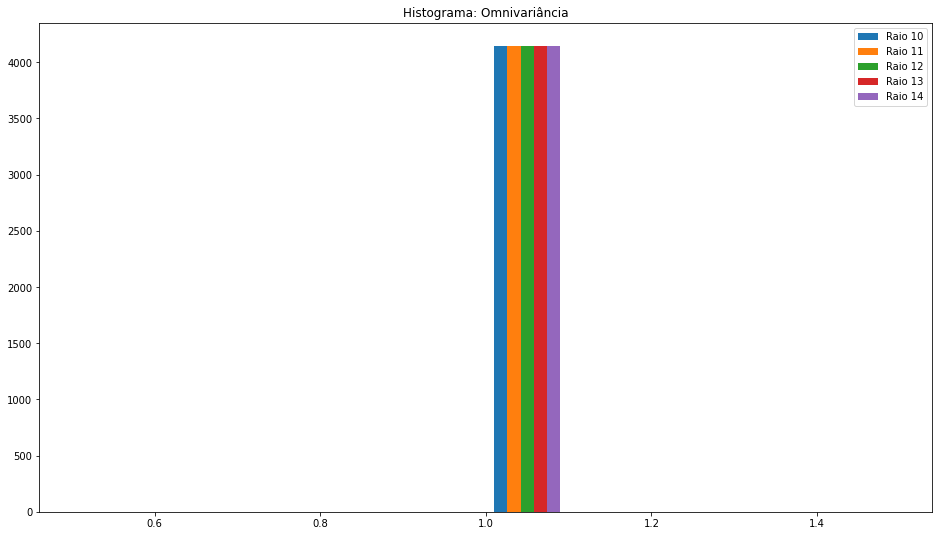

In [79]:
plot_histogram_together(df, gfIndex=1)

In [112]:
# helper datasets
dfr10 = df.iloc[:,1:10]
dfr10.columns = features
dfr11 = df.iloc[:,10:19]
dfr11.columns = features
dfr12 = df.iloc[:,19:28]
dfr12.columns = features
dfr13 = df.iloc[:,28:37]
dfr13.columns = features
dfr14 = df.iloc[:,37:46]
dfr14.columns = features

In [113]:
def plot_scatterplot(df, column, expression=None):
    nrows, ncols = 3, 3
    fig, axes = plt.subplots(nrows, ncols)
    fig.tight_layout()
    
    if expression is not None:
        df = df.loc[df['expression'] == expression]

    i, j = 0, 0 # refactor
    for index, col in enumerate(df.columns):
        df.plot.scatter(ax=axes[i, j], x=column, y=col)
        j += 1
        if j == 3:
            i += 1
            j = 0

    plt.show()

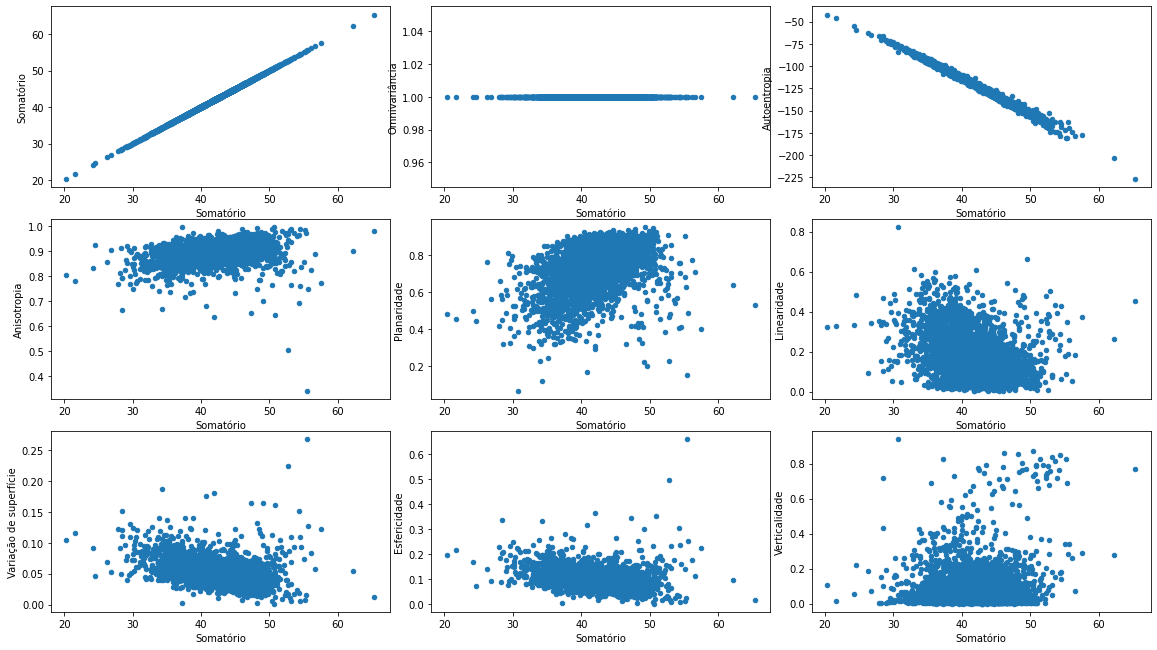

In [114]:
plot_scatterplot(dfr10, 'Somatório')

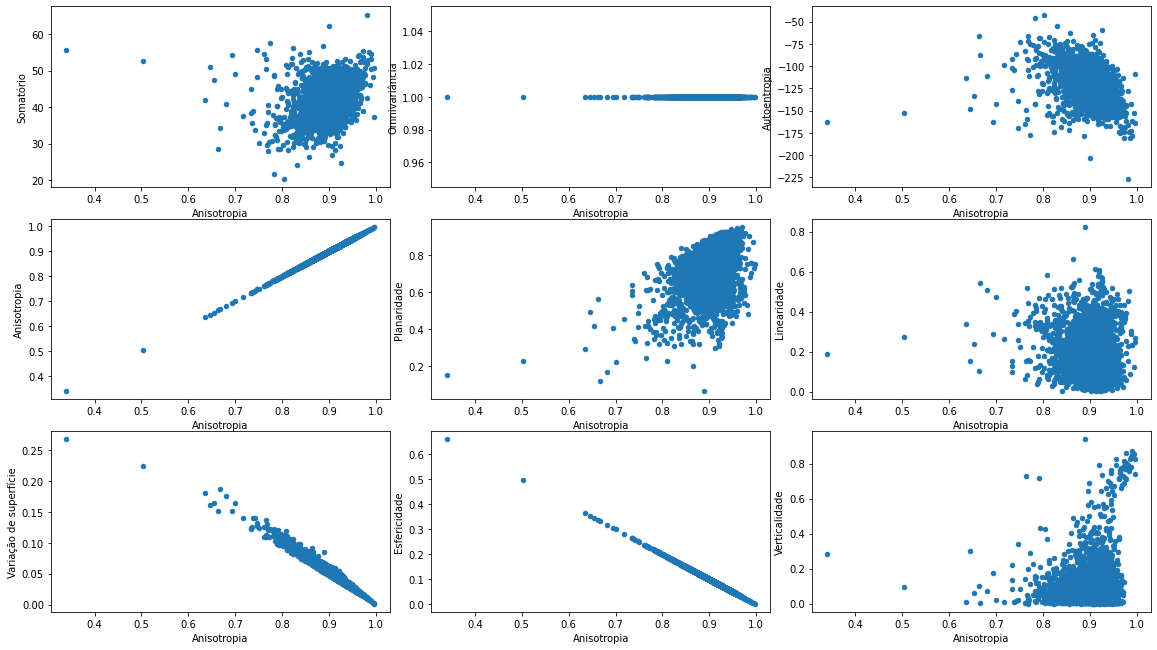

In [115]:
plot_scatterplot(dfr10, 'Anisotropia')